In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:


def rewrite_geant4_csv_header(input_path, output_path):
    with open(input_path, 'r') as infile:
        lines = infile.readlines()

    # Extract column names from metadata
    column_names = []
    data_start_index = 0
    for i, line in enumerate(lines):
        if line.startswith("#column"):
            match = re.match(r"#column\s+\w+\s+(\w+)", line)
            if match:
                column_names.append(match.group(1))
        elif not line.startswith("#"):
            data_start_index = i
            break

    # Write new file with standard header
    with open(output_path, 'w') as outfile:
        outfile.write(",".join(column_names) + "\n")  # new header
        for line in lines[data_start_index:]:
            outfile.write(line)

def Getinfo(f1,f2):
    rewrite_geant4_csv_header(f1,f2)
    return pd.read_csv(f2)

    


In [3]:
G4Result=Getinfo("../debug/out_nt_Geant4Hits_t0.csv", "Geant4Hits_clean.csv")
OptResult=Getinfo("../debug/out_nt_OpticksHits_t0.csv", "OpticksHits_clean.csv")
PhotonInfo=Getinfo("../debug/out_nt_PhotonInfo_t0.csv", "PhotonInfo_clean.csv")



In [4]:
print(len(OptResult['z']))
print(len(G4Result['z']))

9487432
9452789


In [5]:
#G4
#evtID,SensorID,SensorName,x,y,z,t,wavelength,ProcessID

#Opticks
#evtID,hit_Id,SensorID,x,y,z,t,wavelength

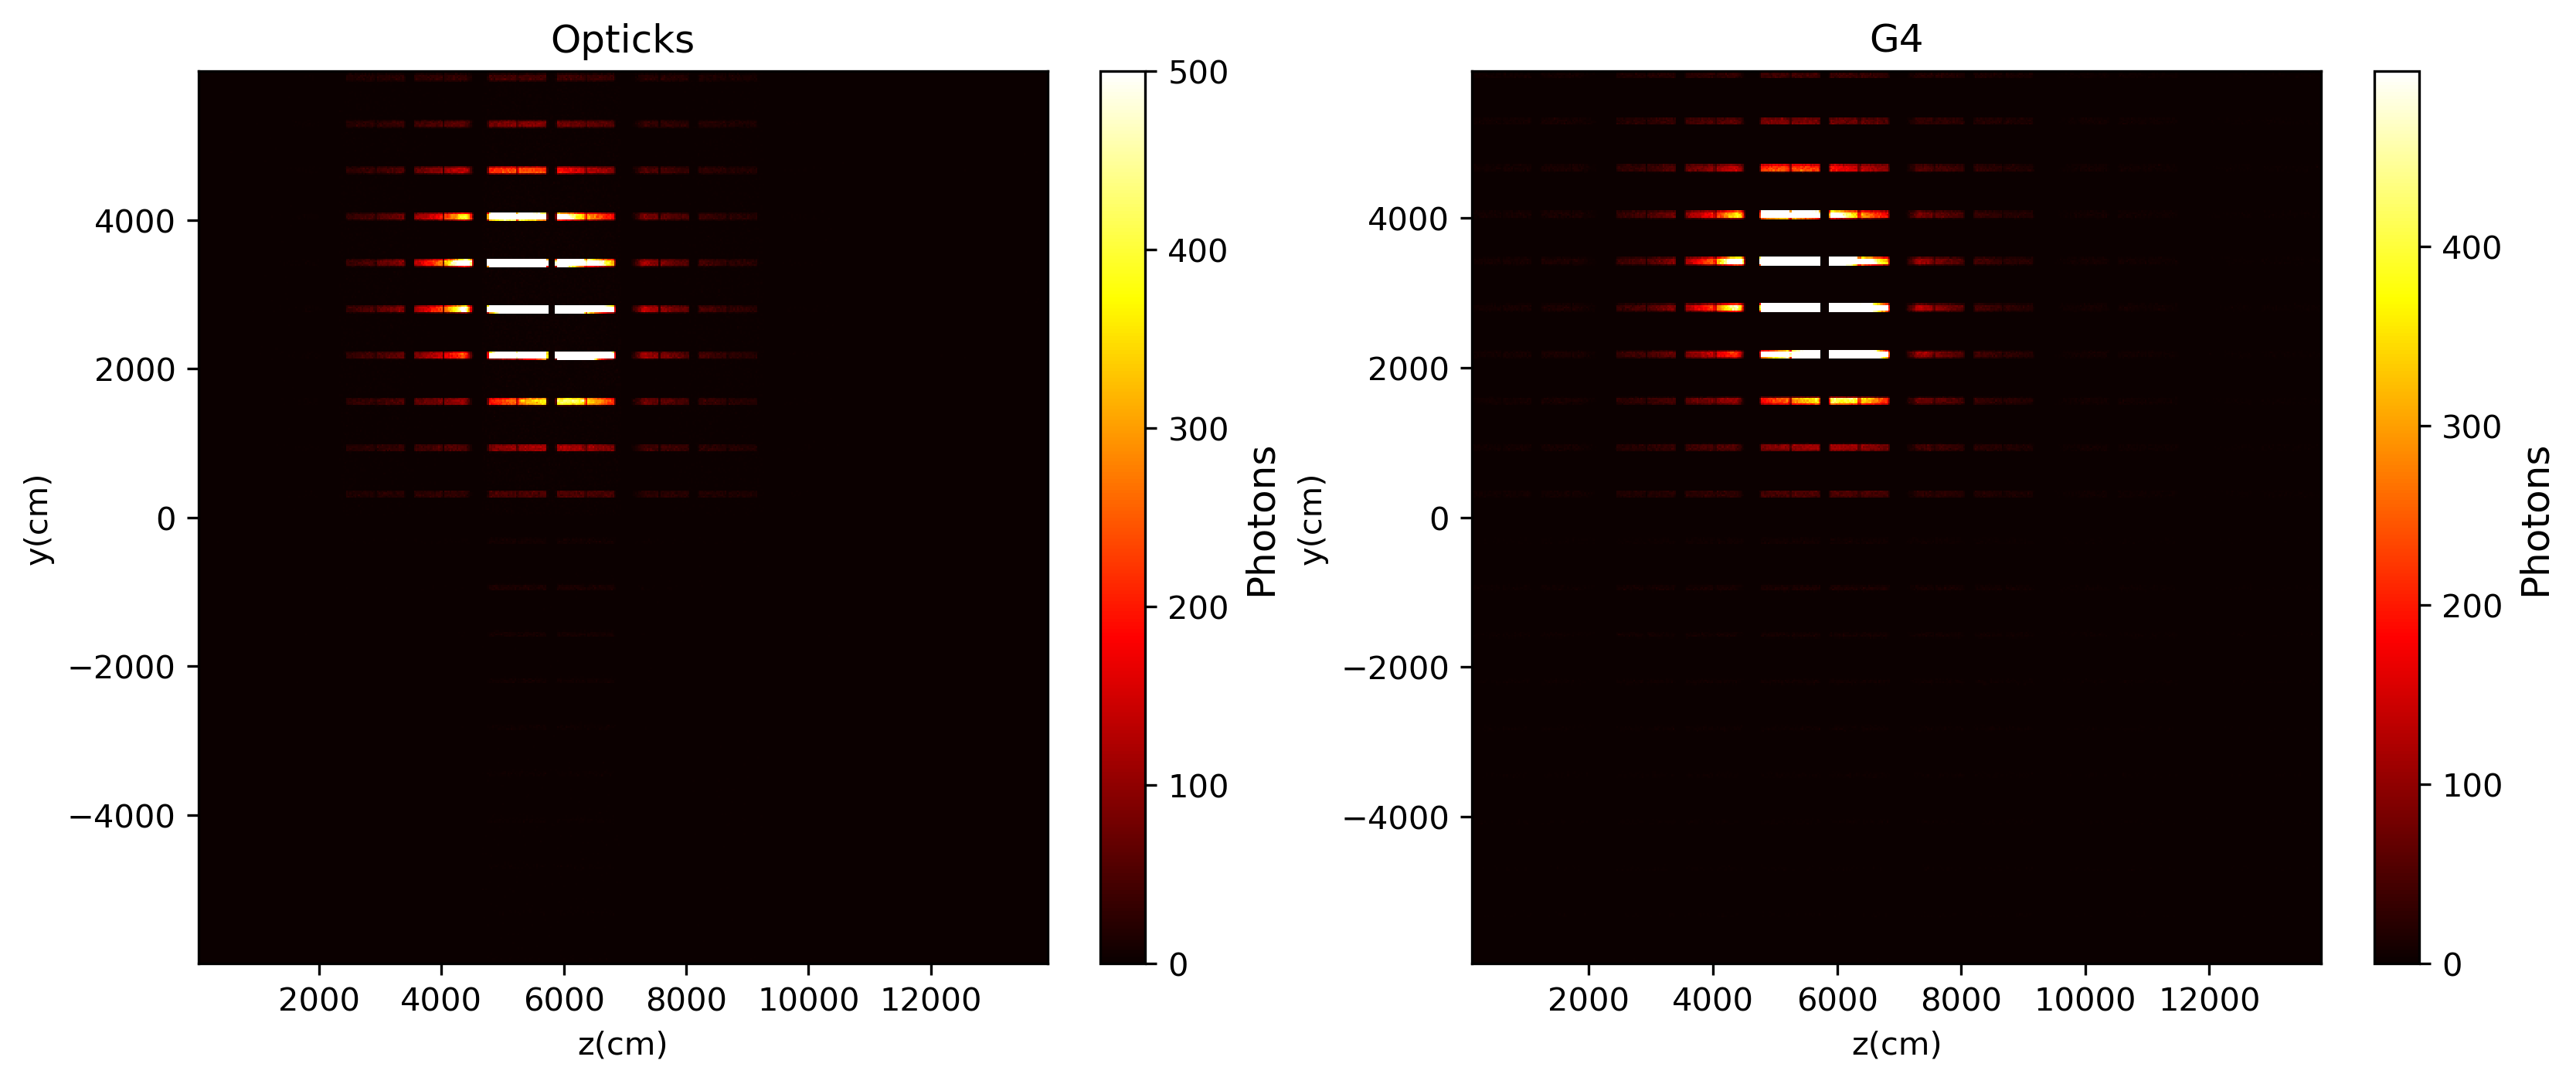

In [38]:
c=500
fig,p=plt.subplots(1,2,dpi=300,figsize=(13,5))
p[0].set_title("Opticks")
h1=p[0].hist2d(OptResult['z'],OptResult['y'],bins=500,cmin=0,cmax=c,cmap="hot",label="Opticks")
cbar1=fig.colorbar(h1[3])
cbar1.set_label("Photons", fontsize=12)
p[1].set_title("G4")
h2=p[1].hist2d(G4Result['z'],G4Result['y'],bins=500,cmin=0,cmax=c,cmap="hot",label="Geant4")
cbar2=fig.colorbar(h2[3])
cbar2.set_label("Photons", fontsize=12)
for i in range(0,2):
    p[i].set_xlabel("z(cm)")
    p[i].set_ylabel("y(cm)")


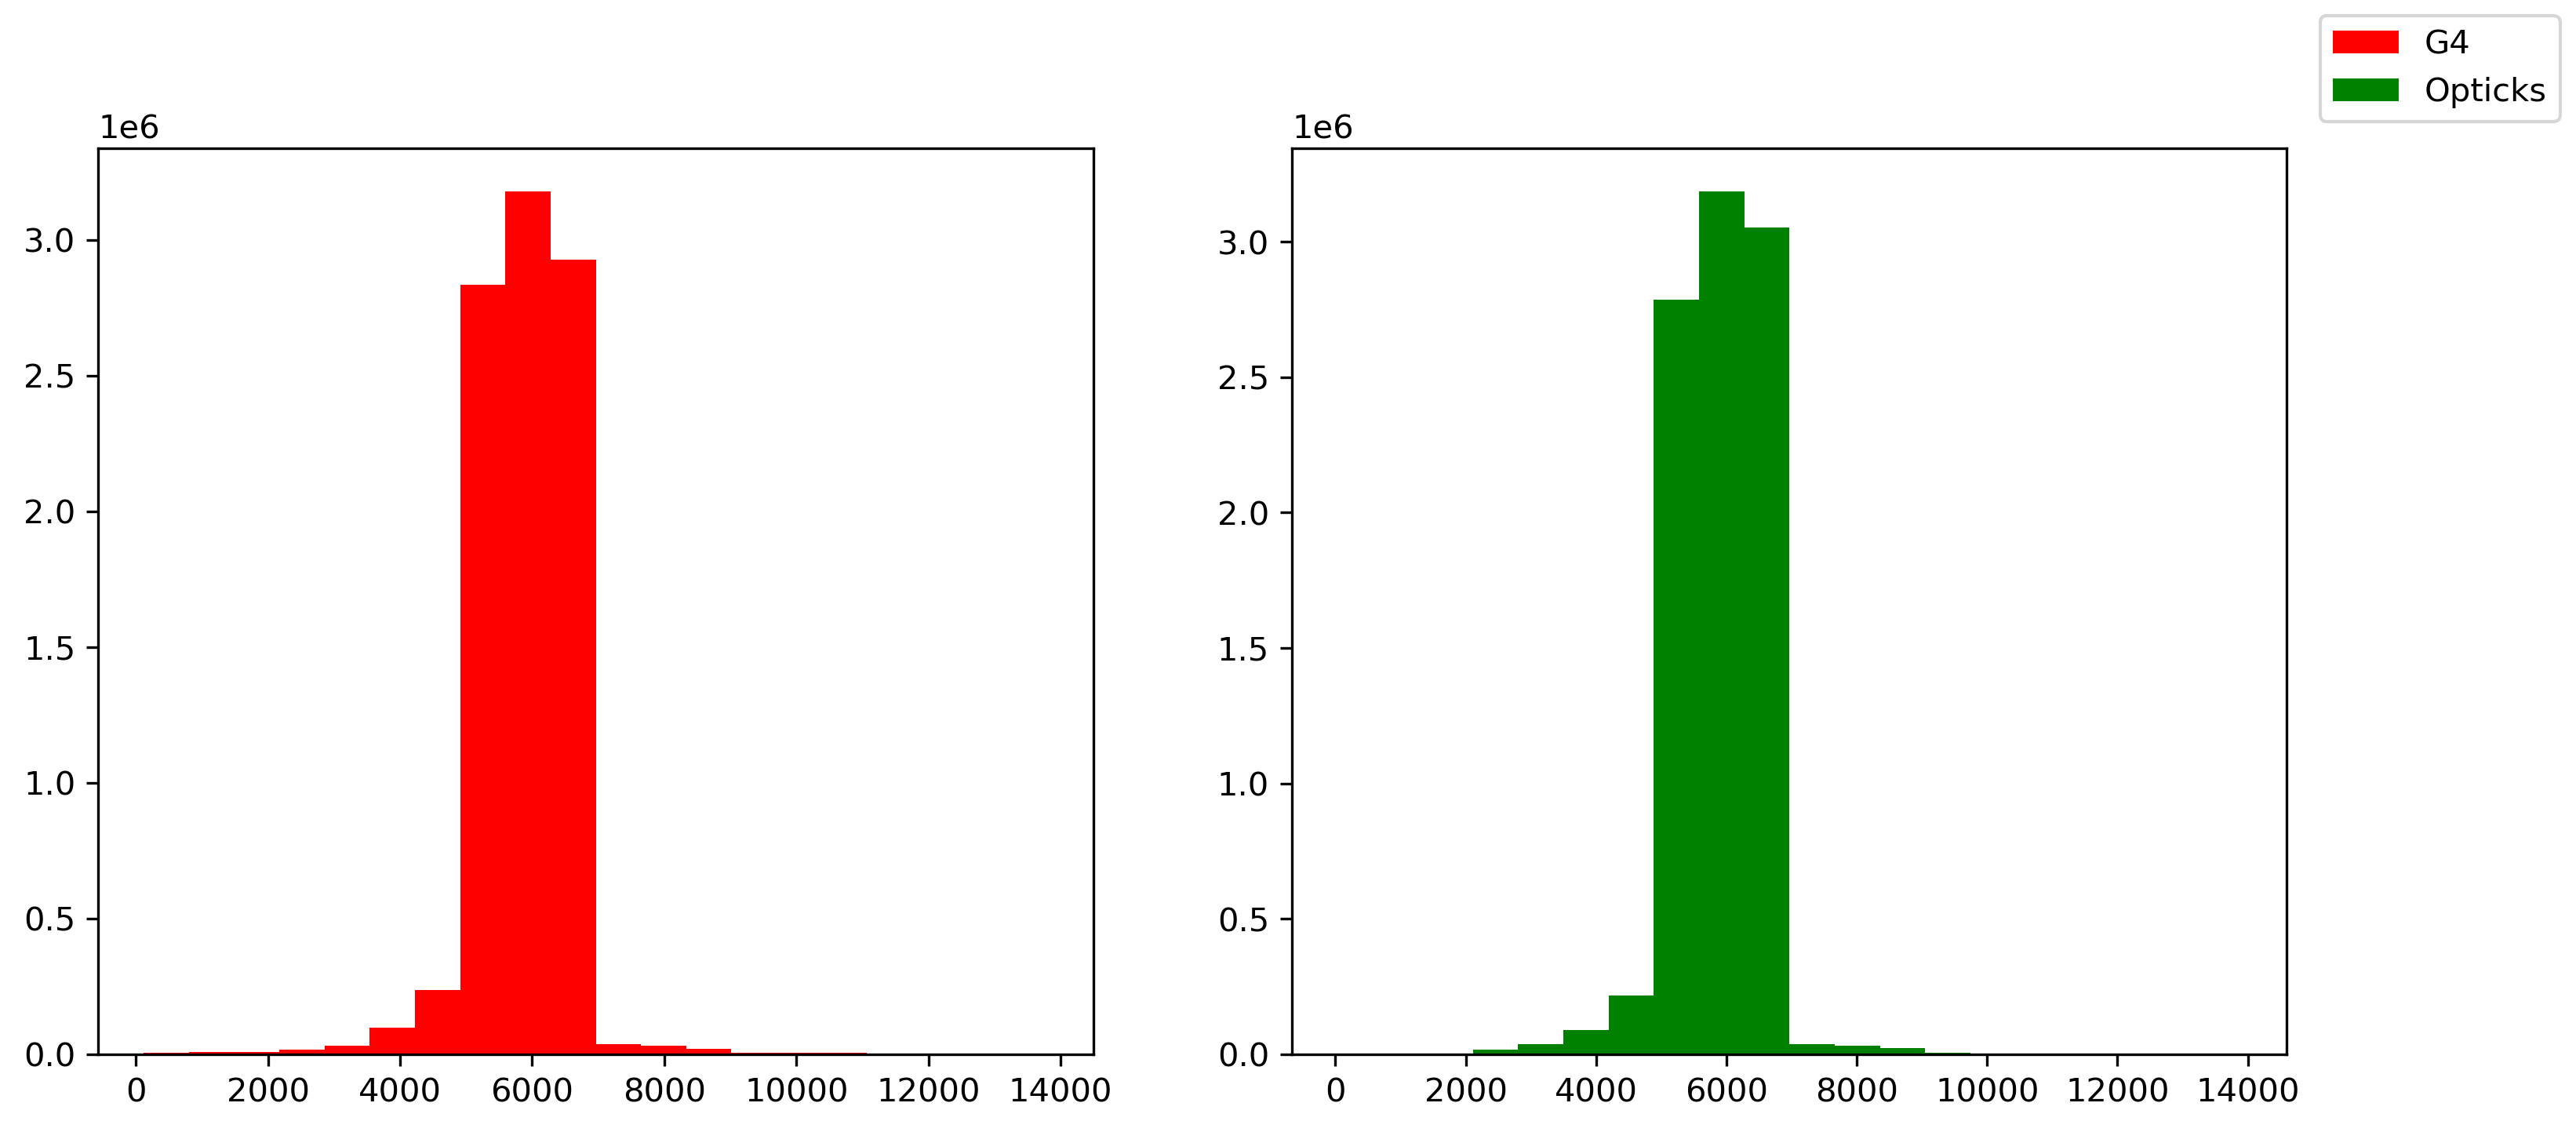

In [11]:
fig,p=plt.subplots(1,2,dpi=300,figsize=(12,5))
_=p[0].hist(G4Result['z'],bins=20,label="G4",color="red")
_=p[1].hist(OptResult['z'],bins=20,label="Opticks",color="green")
fig.legend()

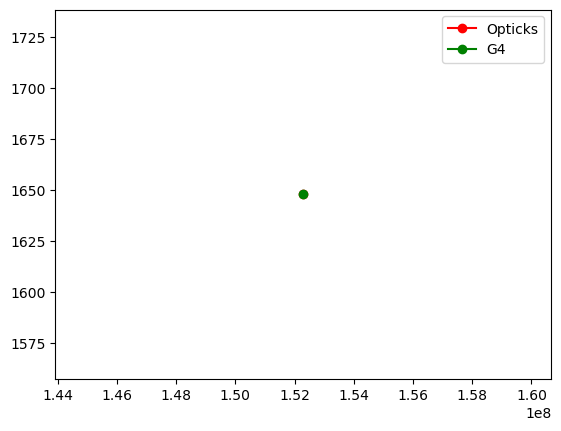

In [8]:
plt.plot(PhotonInfo["OScintPhotons"],PhotonInfo["Time"],color="red",linestyle='-',marker='o',label="Opticks")
plt.plot(PhotonInfo["G4ScintPhotons"],PhotonInfo["Time"],color="green",linestyle='-',marker='o',label="G4")
plt.legend()
plt.show()

In [9]:
print(PhotonInfo)

   G4ScintPhotons  G4CernPhotons  OScintPhotons  OCerenkovPhotons     Time  \
0       152292084              0      152292084                 0  1647.72   

   eventID  
0        0  


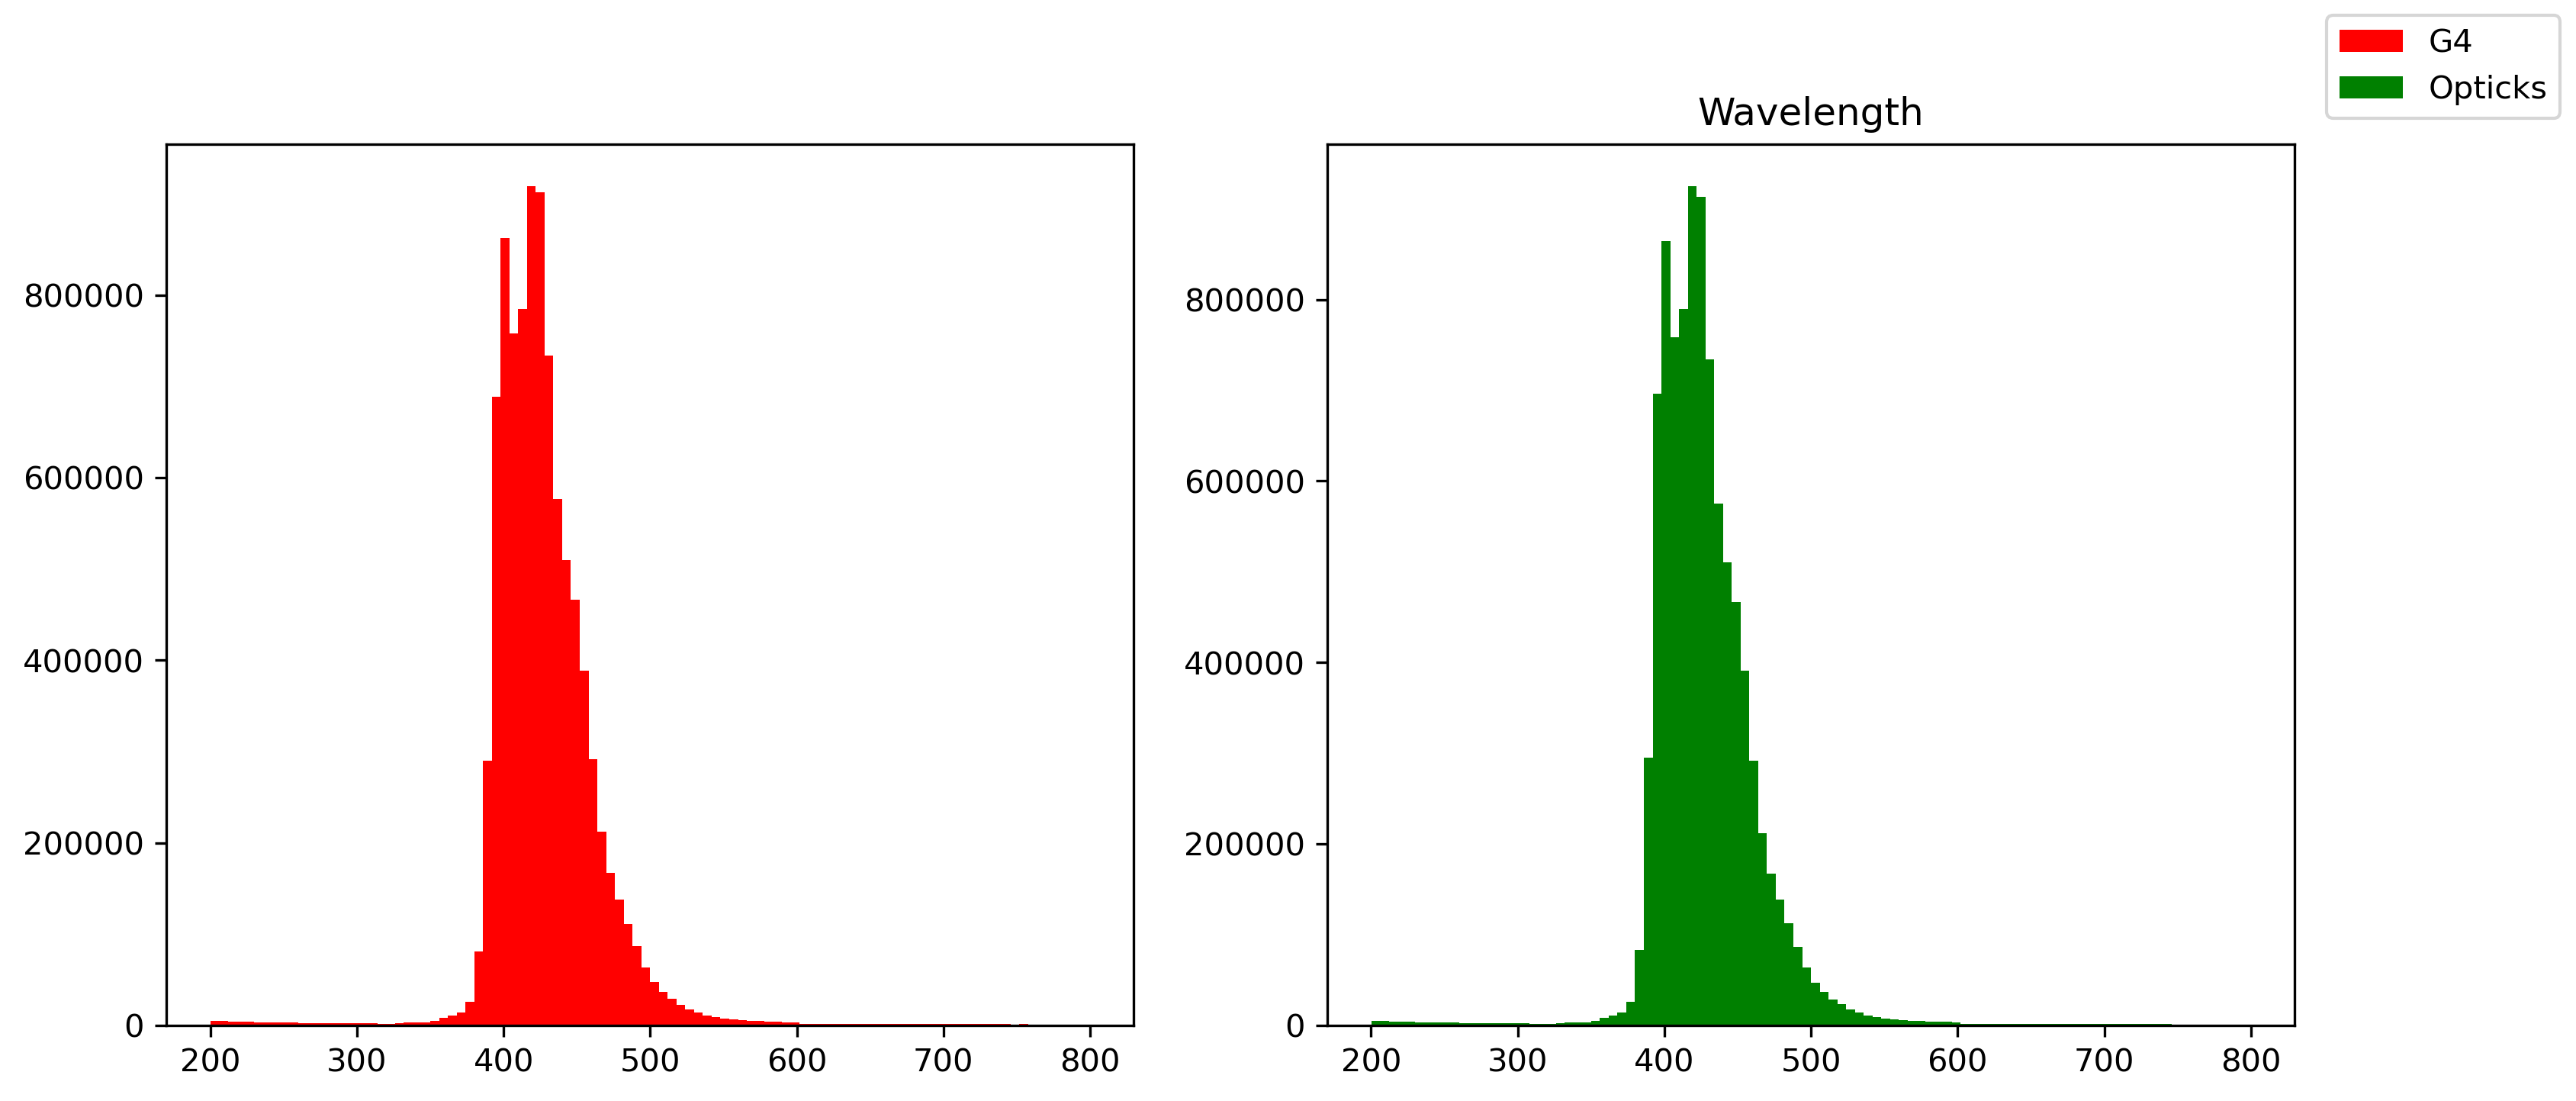

In [10]:
fig,p=plt.subplots(1,2,dpi=300,figsize=(12,5))
plt.title("Wavelength")
_=p[0].hist(G4Result['wavelength'],bins=100,label="G4",color="red")
_=p[1].hist(OptResult['wavelength'],bins=100,label="Opticks",color="green")
fig.legend()